<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/SimpleAnaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

In [60]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/UMTMVS.csv", index_col='DATE', parse_dates=True)

In [61]:
data.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [62]:
data.tail()

,UMTMVS
DATE,
2018-09-01,516992.0
2018-10-01,527031.0
2018-11-01,495901.0
2018-12-01,490076.0
2019-01-01,466791.0


In [63]:
data.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

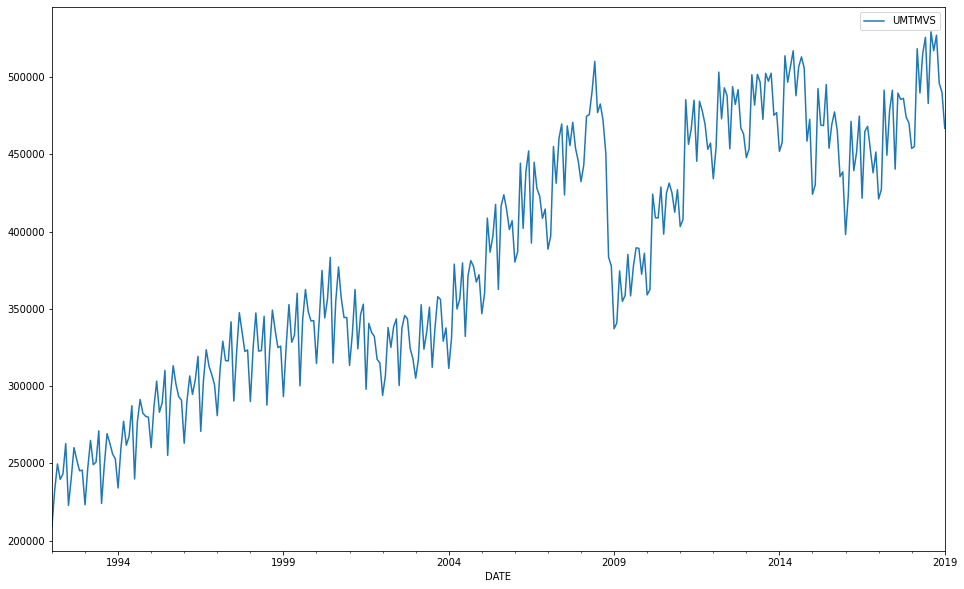

In [64]:
data.plot(figsize=(16,10))

**% Increase value from 2009-2019**

In [65]:
100*(data.loc['2019-01-01'] - data.loc['2009-01-01'])/data.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

**% decrease value from 2008-2009**

In [66]:
100*(data.loc['2009-01-01'] - data.loc['2008-01-01'])/data.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

**Which month least value After 2005**

In [67]:
data.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 Month have Highest value**

In [68]:
data.sort_values(by='UMTMVS', ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


**How many millions of dollar in value lost in 2008(diffrence between 2008 - 2009)**

In [69]:
data.loc['2008-01-01'] - data.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

**Average value per year in millions**

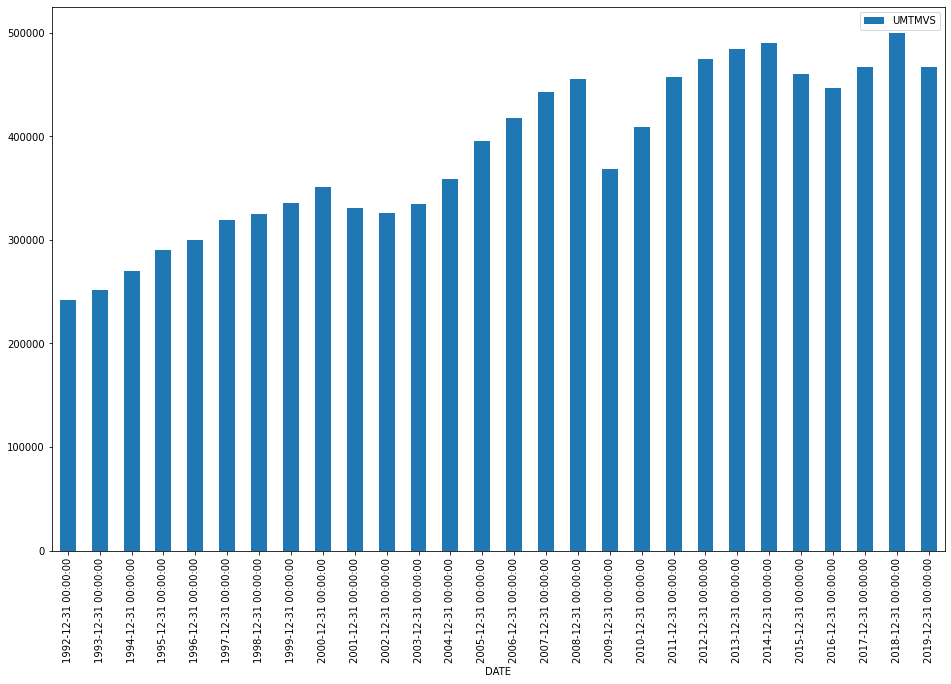

In [70]:
data.resample('A').mean().plot.bar(figsize=(16,10))

**Some month 2008 the value peacked for the yaer. how many month did it take to surpass the 2008 peak**

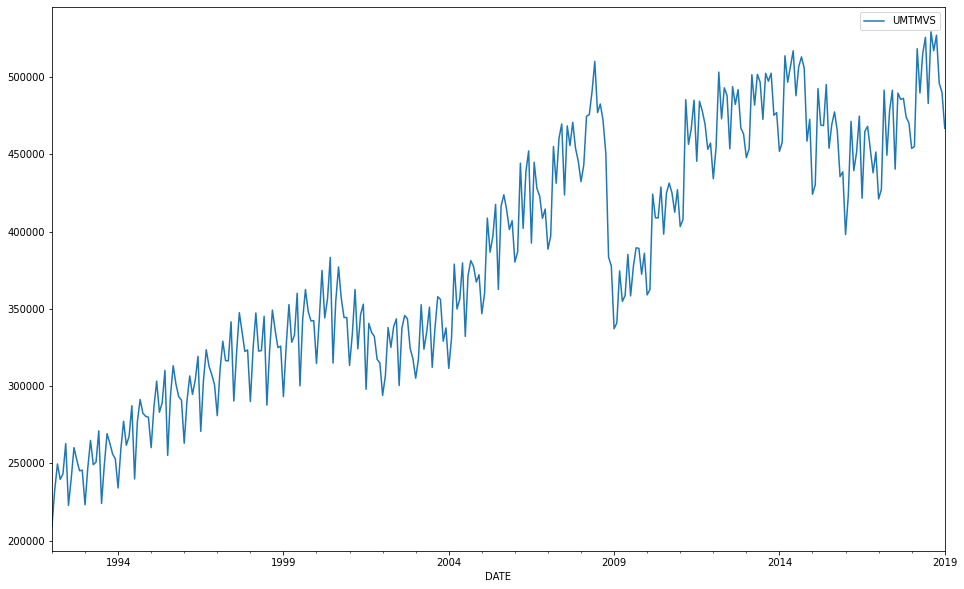

In [71]:
data.plot(figsize=(16,10))

In [72]:
data_tmp = data.loc['2008-01-01': '2008-12-01']
data_tmp.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [73]:
data_tmp.max()

UMTMVS    510081.0
dtype: float64

In [74]:
data_tmp_peak = data.loc[data_tmp.idxmax()[0]:]
data_tmp_peak = data_tmp_peak[data_tmp_peak>=data_tmp.max()[0]].dropna()


In [75]:
print("Month are taken peak over come:-\t", len(data.loc[data_tmp_peak.index[0]: data_tmp_peak.index[1]]))

Month are taken peak over come:-	 70


**What year have mean value increase from the privious year**

In [76]:
yearly_data = data.resample('A').mean()

In [77]:
yearly_data_shift = yearly_data.shift(1)

In [78]:
change = yearly_data - yearly_data_shift

In [79]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot yearly rolling mean top of orginal data**

In [80]:
data['YearlyMean'] = data['UMTMVS'].rolling(window=12).mean()


In [81]:
data.head(12)

,UMTMVS,YearlyMean
DATE,,
1992-01-01,209438.0,NaN
1992-02-01,232679.0,NaN
1992-03-01,249673.0,NaN
1992-04-01,239666.0,NaN
1992-05-01,243231.0,NaN
1992-06-01,262854.0,NaN
1992-07-01,222832.0,NaN
1992-08-01,240299.0,NaN
1992-09-01,260216.0,NaN


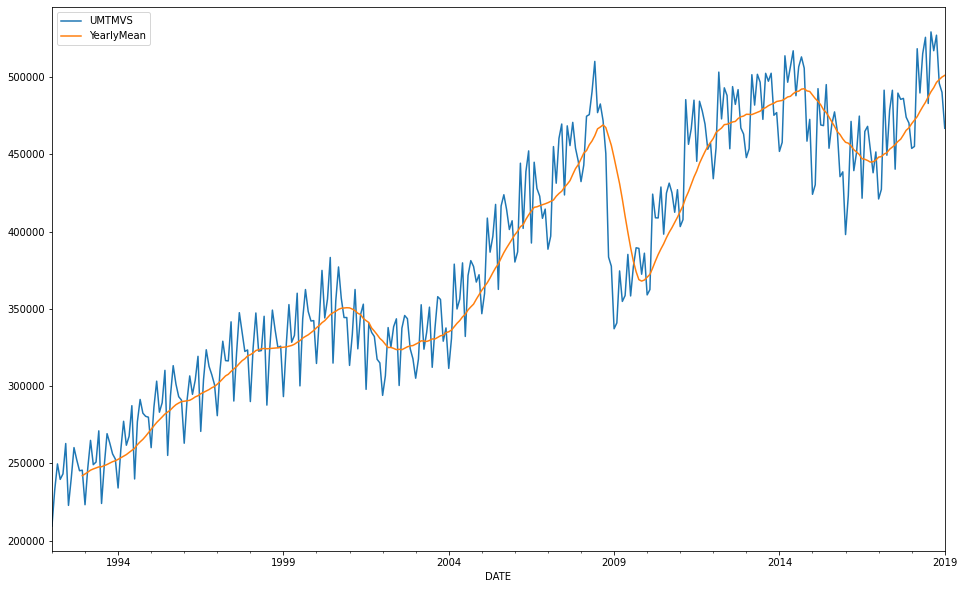

In [82]:
data.plot(figsize=(16,10))